<a href="https://colab.research.google.com/github/ikhlas15/ATHENS-AI-Medical-Imaging/blob/main/H05_pytorch_primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 05: A Primer on PyTorch for Medical Imaging**

### **Course**: Artificial Intelligence in Medical Imaging: From Fundamentals to Applications

***

## **1. Introduction**

Welcome to the world of PyTorch! In the last notebook, you built a logistic regression classifier from scratch, which gave you a deep understanding of the mechanics of machine learning. Now, it's time to transition to a powerful, industry-standard deep learning framework that will handle much of that low-level work for us.

**PyTorch** is a flexible and intuitive framework that has become a favorite in the research community, especially for computer vision and medical imaging.

#### **What you will learn today:**
*   **Tensors:** The fundamental data structure of PyTorch, similar to NumPy arrays but with GPU support.
*   **Autograd:** PyTorch's automatic differentiation engine that computes gradients for us.
*   **`nn.Module`:** The base class for building all neural network models in PyTorch.
*   **`Dataset` and `DataLoader`:** The standard, efficient way to load and iterate over image data.
*   How to leverage a **GPU** for massive speedups using CUDA.

We will use the same PneumoniaMNIST dataset to see how these concepts apply directly to a medical imaging problem.

***

## **2. Setup: Installing PyTorch and Other Libraries**

Let's start by installing the necessary packages and importing them.

In [ ]:
# TODO: Install PyTorch, torchvision (for computer vision utilities), and medmnist

#Import necessary libraries and modules
import torch
import torch.nn as nn #defines layers and networks
import torch.nn.functional as F #activation function
from torch.utils.data import Dataset, DataLoader #batches and shuffling
import torchvision.transforms as transforms #normalize/augment images
from medmnist import PneumoniaMNIST
import numpy as np
import matplotlib.pyplot as plt

# TODO: Set our standard random seed for reproducibility

#Check if CUDA is available then set a seed


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 5.5 MB/s eta 0:00:00


### **Checking Your Environment**
A crucial first step is to check your PyTorch version and, most importantly, whether PyTorch can detect a GPU.

In [ ]:
print(f"PyTorch Version: {...}")
print(f"CUDA Available: {...}")

# Define our device. We will send our data and models to this device.
device = torch.device("cuda" if ... else "cpu")
print(f"Using device: {...}")

PyTorch Version: 2.8.0+cu126
CUDA Available: True
Using device: cuda


***

## **3. The Heart of PyTorch: Tensors**

A **tensor** is a multi-dimensional array, very similar to a NumPy array. However, a key difference is that tensors can be moved to a GPU to accelerate computations.

### **3.1. Creating Tensors**
You can create tensors from Python lists or NumPy arrays.

In [ ]:

# Create a tensor from a list
data_list = [[1, 2], [3, 4]]
# TODO: convert the list to a PyTorch tensor
tensor_a = torch.tensor(...)
print("Tensor from list:\n", ...)

# Create a tensor of random values
# TODO: create a 2x3 tensor with random values between 0 and 1
tensor_b =
#TODO: print the random tensor b
print("\nRandom tensor:\n", ...)

# Convert a NumPy array to a tensor
numpy_array = np.array([5, 6, 7])
# TODO: convert the NumPy array to a PyTorch tensor
tensor_c =
print("\nTensor from NumPy array:\n", tensor_c)

Tensor from list:
 tensor([[1, 2],
        [3, 4]])

Random tensor:
 tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])

Tensor from NumPy array:
 tensor([5, 6, 7])


### **3.2. Tensor Operations**
PyTorch supports a vast range of mathematical operations, just like NumPy.

In [ ]:
# Element-wise addition
# TODO: perform element-wise addition (add 10 to tensor a)
result_add =
print("Addition result:\n", ...)

# Matrix multiplication
# TODO: create a 3x4 matrix with values from normal distribution (Gaussian)
mat1 =

# TODO: create a 4x5 matrix with values from normal distribution (Gaussian)
mat2 =

# TODO: perform matrix multiplication (output size:3x4 @ 4x5 → 3x5)
result_mm =
print(f"\nMatrix multiplication result shape: {...}")

Addition result:
 tensor([[11, 12],
        [13, 14]])

Matrix multiplication result shape: torch.Size([3, 5])


***

## **4. Autograd: Automatic Differentiation**

This is one of PyTorch's most powerful features. When you create a tensor with `requires_grad=True`, PyTorch builds a **computation graph**. This graph tracks every operation performed on the tensor.

When you call `.backward()` on a final result (like a loss value), PyTorch uses this graph to automatically compute the gradients of that result with respect to all the input tensors. This is how we get the gradients needed for training without having to derive them by hand!

Let's see a simple example with the function $y = 3a^2 + 2b$. We want to find $\frac{\partial y}{\partial a}$ and $\frac{\partial y}{\partial b}$.


In [ ]:
# TODO: create a tensor with value 2.0 and enable gradient tracking
a =

# TODO: create a tensor with value 5.0 and enable gradient tracking
b =

# TODO: define the function y = 3a² + 2b using a and b
y =

print(f"Result y: {...}")

# TODO: compute the gradients via backpropagation
y. ...()

# TODO: access gradients from the .grad attribute
print(f"Gradient dy/da at a=2 is: {...}")   # Expected: 6*a = 12
print(f"Gradient dy/db at b=5 is: {...}")   # Expected: 2

Result y: 22.0
Gradient dy/da at a=2 is: 12.0
Gradient dy/db at b=5 is: 2.0


***

## **5. Loading Medical Images: `Dataset` and `DataLoader`**

PyTorch provides two elegant classes for handling
*   **`Dataset`**: An object that knows how to access a single data point (e.g., one chest X-ray and its label).
*   **`DataLoader`**: Wraps a `Dataset` and provides an iterator to easily loop over the data in **batches**, with options for shuffling and parallel loading.

### **5.1. Using a Pre-built Dataset (PneumoniaMNIST)**
The `medmnist` library provides a PyTorch-compatible `Dataset` for us. We'll also define some **transforms**—operations to be applied to each image as it's loaded (e.g., converting to a tensor, normalizing).


In [ ]:
# Define the transformations
# 1. transforms.ToTensor(): Converts a PIL Image or NumPy array to a PyTorch tensor and scales pixel values to [0, 1].
# 2. transforms.Normalize(): Normalizes the tensor with a given mean and standard deviation.
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5]) # Normalizes to range [-1, 1] (x_normalized= (x-mean)/std)
])

# Load the training data using the PneumoniaMNIST dataset class
train_dataset = PneumoniaMNIST(split='train', transform=..., download=True)

# Create a DataLoader to handle batching and shuffling
# batch_size=64 means we'll process 64 images at a time.
train_loader = DataLoader(dataset=..., batch_size=..., shuffle=True)

# Let's inspect the first batch
images, labels = next(iter(train_loader))

print(f"Shape of one batch of images: {...}") # [Batch Size, Channels, Height, Width]
print(f"Shape of one batch of labels: {...}")
print(f"Data type of images: {...}")

100%|██████████| 4.17M/4.17M [00:02<00:00, 1.46MB/s]


Shape of one batch of images: torch.Size([64, 1, 28, 28])
Shape of one batch of labels: torch.Size([64, 1])
Data type of images: torch.float32


### **5.2. Visualizing a Batch of Medical Images**

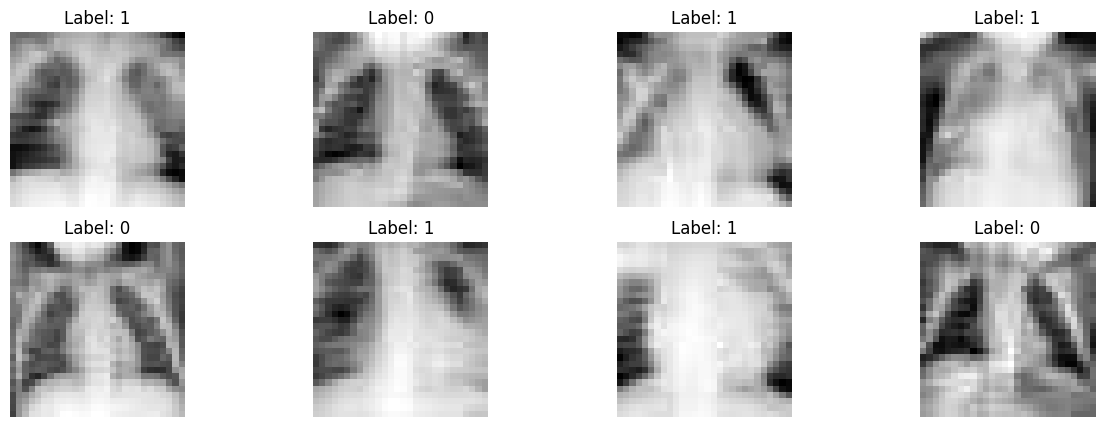

In [ ]:
# TODO: define a function to display a batch of images and their labels
def show_images(...,... , n=...):
    plt.figure()  # TODO: adjust figure size to (15, 5)
    for i in range(n):
        plt.subplot(2, n//2, i+1)
        # We need to un-normalize to see the image correctly
        img =
        plt.imshow(img.squeeze(), cmap="gray") # .squeeze() removes the channel dimension
        plt.title(f"Label: {}") # extract the number inside the label tensor for each image
        plt.axis('off')
    plt.show()

show_images(images, labels)

***

## **6. Building Models with `nn.Module`**

In PyTorch, all neural network models are created by subclassing `torch.nn.Module`. You define the layers of your network in the `__init__` method and specify how data flows through them in the `forward` method.

Let's build a very simple Convolutional Neural Network (CNN).

In [ ]:
# Let's define a simple CNN by subclassing nn.Module
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Our network has two main blocks
        # Block 1: Convolution -> Activation (ReLU) -> Pooling
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        # Block 2: Another Conv -> Activation -> Pooling
        self.conv2 = ...(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = ...
        self.pool2 = ...(kernel_size=2)

        # A fully connected layer for classification
        # The input size is calculated based on the output of the pooling layers: 32 channels * 7x7 image size
        self.fc = nn.Linear(in_features=..., out_features=2) # 2 classes: normal or pneumonia

    def forward(self, x):
        # Define the forward pass
        x = self.pool1(self.relu1(self.conv1(x)))
        # TODO: Block 2 forward
        x =

        # Flatten the output from the convolutional layers before sending to the fully connected layer
        x = x.view(-1, 32 * 7 * 7)

        # Final output (logits)
        x = self.fc(x)
        return x

# Create an instance of our model
model =

# Move the model to the GPU if available
model.to(...)

#Print model summary
print(model)

SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=1568, out_features=2, bias=True)
)


### **Performing a Forward Pass**
Let's pass a batch of images through our untrained model to see the output.

In [ ]:
# Get a batch of images and move them to the correct device
images, _ = next(...)

# TODO: move images to the correct device (e.g. CPU or GPU)
images = images.to(...)

# TODO: perform forward pass through the model to get logits
output =

# TODO: print the shape of the output tensor
print(f"Shape of the model's output: {}")

# TODO: print the first 5 logits (raw scores before softmax)
print("First 5 outputs (logits):\n",...)


Shape of the model's output: torch.Size([64, 2])
First 5 outputs (logits):
 tensor([[ 0.0966, -0.0124],
        [ 0.0672, -0.0036],
        [ 0.1358,  0.0156],
        [ 0.0583, -0.0130],
        [ 0.0579, -0.0406]], device='cuda:0', grad_fn=<SliceBackward0>)


The output shape is `[64, 2]`, which is `[batch_size, num_classes]`, as expected. These raw values (logits) will be passed to a loss function during training.

***

## **7. Summary and Next Steps**



In the next notebook, **`06_training_loop_and_metrics.ipynb`**, we will combine everything you've learned here to write a complete training loop, including defining a loss function, an optimizer, and an evaluation step.
